# Random Walks of 1000 people

[statistical rethinking](https://xcelab.net/rm/statistical-rethinking/) 책의 챕터 3에 나오는 그래프를 아래와 같이 그려보았다.
(원본은 R로 되어 있으며 파이썬으로 동일한 자료를 작성하였다)

## 그래프 설명

1000명이 16발자국을 걸었다고 한다면 어떤 경로를 보일까? 단순화 하기 위해서 앞뒤로만 움직일 수 있고(1차원) 각 발자국 간격은 1, -1 사이에 뽑일 확률이 균일하다고 가정했다.

In [2]:
#  사용 패키지 및 그래프 설정
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

numpy를 사용해서 랜덤하게 16개의 숫자를 뽑은 뒤 누적합계(cumsum)를 구했다. 단, 0부터 시작되도록 0을 가장 앞에 추가해서 행을 만들었다. 

In [3]:
walks = np.array(
    list(map(lambda _: np.append(np.array([0]), np.random.uniform(low=-1, high=1, size=16).cumsum()), range(1000)))
)

x를 스텝수, y를 위치로 하는 그래프를 그렸으며, 첫번째 인원의 위치를 검은 색으로 강조하였다.

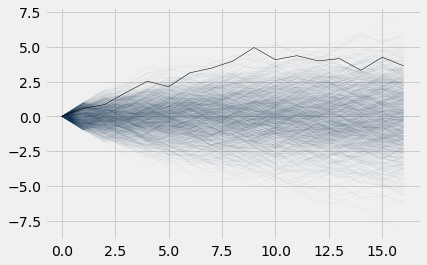

In [4]:
for i in walks:
    plt.plot(i, color="#123456", linewidth=0.02)
plt.plot(walks[0], color="black", linewidth=0.5)
plt.show()

이제 책에서 하던 것처럼 복합그래프를 그렸다.

`matplotlib`에서 gridspec을 사용해서 배치를 하였으며 4걸음, 8걸음, 16걸음을 갔을 때 위치를 표시하였다.

특히 마지막 플롯에서는 데이터의 평균과 표준편차를 사용한 정규분포를 만들어서 표현하였으며, 상당히 유사하게 근사할 수 있음을 확인할 수 있었다.

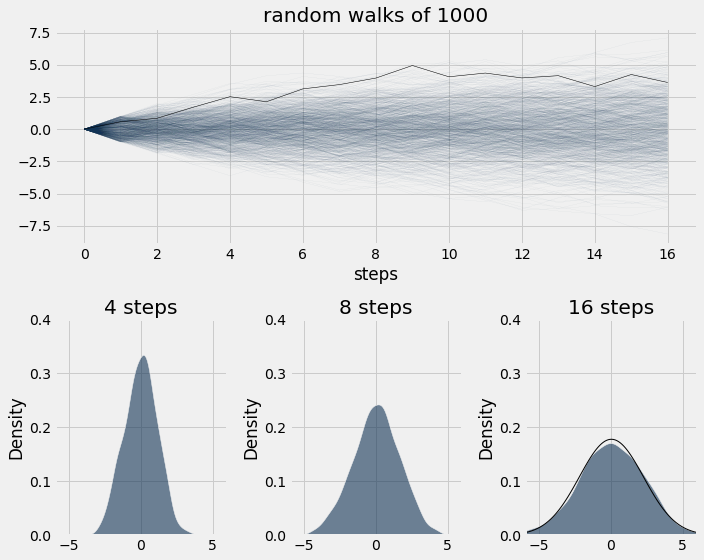

In [6]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

for i in walks:
    ax1.plot(i, color="#123456", linewidth=0.02)
ax1.plot(walks[0], color="black", linewidth=0.5)
ax1.set_xlabel("steps")

get_plot = lambda ax, data: sns.kdeplot(data, color="#123456", alpha=0.6, multiple="stack", ax=ax)

get_plot(ax2, walks[:, 4])
get_plot(ax3, walks[:, 8])
get_plot(ax4, walks[:, 16])

ax1.set_title("random walks of 1000")
ax2.set_title("4 steps")
ax3.set_title("8 steps")
ax4.set_title("16 steps")

for ax in [ax2, ax3, ax4]:
    ax.set_xlim(-6, 6)
    ax.set_ylim(0, 0.4)
plt.tight_layout()

#add normal
data = walks[:, 16]
rv = norm(data.mean(), data.std(ddof=0))
xs = np.linspace(-6, 6, num=100)
ax4.plot(xs, rv.pdf(xs), color="black", linewidth=1)
plt.show()

이 작업을 통해서 gridspec을 활용한 자유로운 그래프를 만들 수 있었으며, 또한 random walk를 아주 간단하게 시뮬레이션 해볼 수 있음을 알 수 있었다.

앞으로 포스터나 인포그래픽을 만들 수 있는 계기가 되지 않을까 생각한다.